**PROJECT TEAM'S ID:"PTID-CDS-MAR-24-1859


**Project : PRCP-1025-FlightPricePrediction**

**Introduction:**

Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often
heard travelers saying that flight ticket prices are so unpredictable. That’s why we will
try to use machine learning to solve this problem. This can help airlines by predicting
what prices they can maintain.

In this article, we will be analysing the flight price prediction using machine learning. Then draw some predictions using various factors.

**Problem Statement:**

Task 1:-Prepare a complete data analysis report on the given data.
Task 2:-Create a predictive model which will help the customers to predict future flight
prices and plan their journey accordingly.

**Dataset:**
1. Airline: So this column will have all the types of airlines like Indigo, Jet Airways,
Air India, and many more.
2. Date_of_Journey: This column will let us know about the date on which the
passenger’s journey will start.
3. Source: This column holds the name of the place from where the passenger’s
journey will start.
4. Destination: This column holds the name of the place to where passengers
wanted to travel.
5. Route: Here we can know about what the route is through which passengers
have opted to travel from his/her source to their destination.
6. Arrival_Time: Arrival time is when the passenger will reach his/her destination.

7. Duration: Duration is the whole period that a flight will take to complete its
journey from source to destination.
8. Total_Stops: This will let us know in how many places flights will stop there for
the flight in the whole journey.
9. Additional_Info: In this column, we will get information about food, kind of food,
and other amenities.
10. Price: Price of the flight for a complete journey including all the expenses
before onboarding.

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Importing dataset**

In [ ]:
dftr = pd.read_excel('/content/Flight_Fare.xlsx')

In [ ]:
dftr

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


**Basic Checks**

In [ ]:
dftr.head(10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [ ]:
dftr.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
dftr.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
dftr.shape

(10683, 11)

In [ ]:
dftr.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
dftr.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
dftr.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [ ]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
dftr.dropna(inplace=True)

In [ ]:
dftr.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
dftr.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


**Exploratory Data Analysis (EDA):**

In [ ]:
dftr['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

 **Extracting Date, Month and Year from the Date of Journey**

In [ ]:

from datetime import datetime
dftr['Year'] = pd.to_datetime(dftr['Date_of_Journey']).dt.year
dftr['Month'] = pd.to_datetime(dftr['Date_of_Journey']).dt.month
dftr['Date'] = pd.to_datetime(dftr['Date_of_Journey']).dt.day

In [ ]:
dftr.drop(['Date_of_Journey'],axis=1,inplace=True)

In [ ]:
# Duration is 5m for a 2 stop flight which is impossible
# Removing this outlier

dftr[dftr['Duration']=='5m']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327,2019,3,6


In [ ]:
dftr.drop([6474,],axis=0,inplace=True)

In [ ]:
# Extracting Dur_hours and Dur_min from the Duration Column

dftr['Dur_hours'] = dftr['Duration'].str.split(' ').str[0]
dftr['Dur_hours'] = dftr['Dur_hours'].str.replace('h','').astype(float)
dftr['Dur_hours'].fillna(0, inplace=True)

dftr['Dur_min'] = dftr['Duration'].str.split(' ').str[1]
dftr['Dur_min'] = dftr['Dur_min'].str.replace('m','').astype(float)
dftr['Dur_min'].fillna(0, inplace=True)

In [ ]:
dftr.drop(['Duration'],axis=1,inplace=True)

In [ ]:
# There is only one record of Trujet in train dataset and zero record in Test dataset
# This will create problem in our model building
# Therefore will remove this record

dftr[dftr['Airline'] == 'Trujet']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Year,Month,Date,Dur_hours,Dur_min
2878,Trujet,Mumbai,Hyderabad,BOM → NDC → HYD,13:05,16:20,1 stop,No info,4140,2019,3,6,3.0,15.0


In [ ]:
dftr.drop([2878,],axis=0,inplace=True)

<Axes: xlabel='Price', ylabel='Density'>

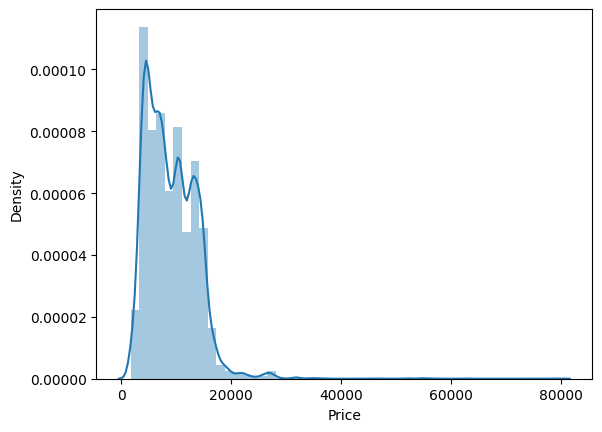

In [ ]:
# Our Dependent Variable Price is not normally distributed therefore would have to apply scaling

sns.distplot(dftr['Price'])

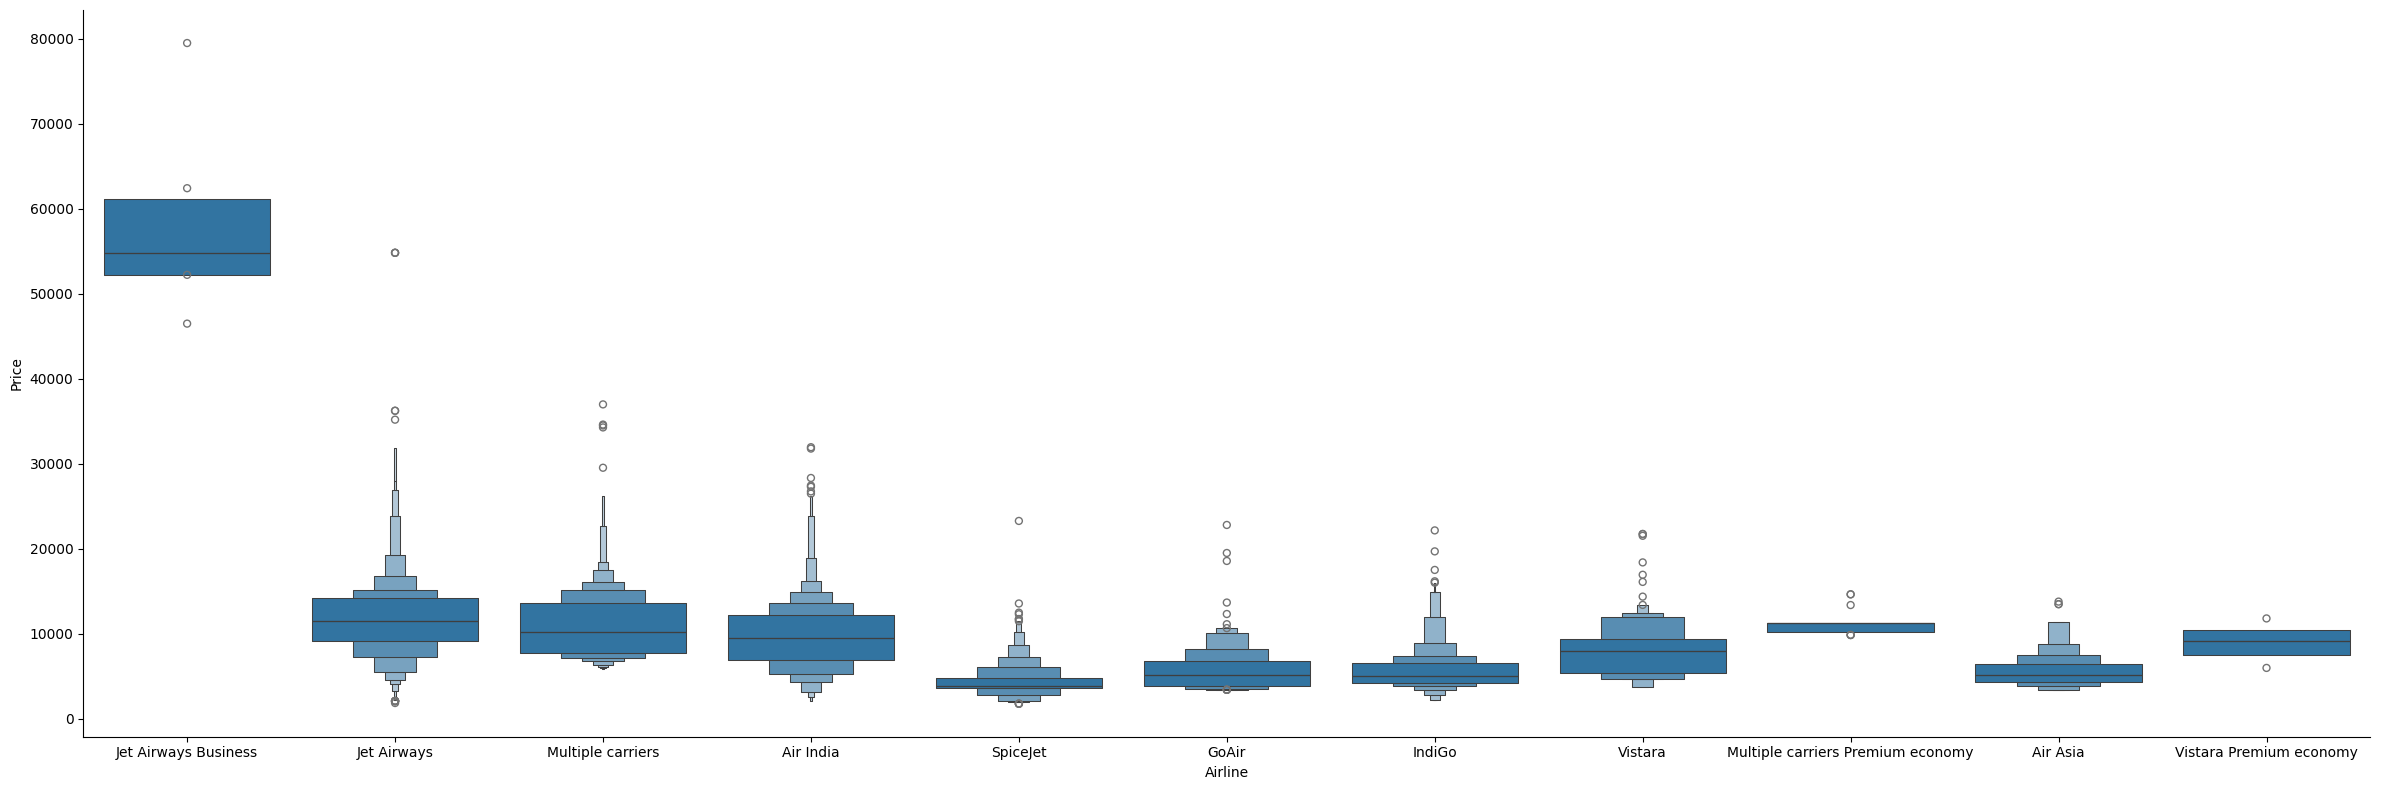

In [ ]:
sns.catplot(y="Price",x="Airline",data=dftr.sort_values("Price",ascending=False),kind="boxen",height=8,aspect=3)
plt.show()

**Insights:**

Here with the help of the cat plot we are trying to plot the boxen plot between the price of the flight and the airline and we can conclude that Jet Airways has the most outliers in terms of price.
And Vistara Premium economy has the least outliers based on price.

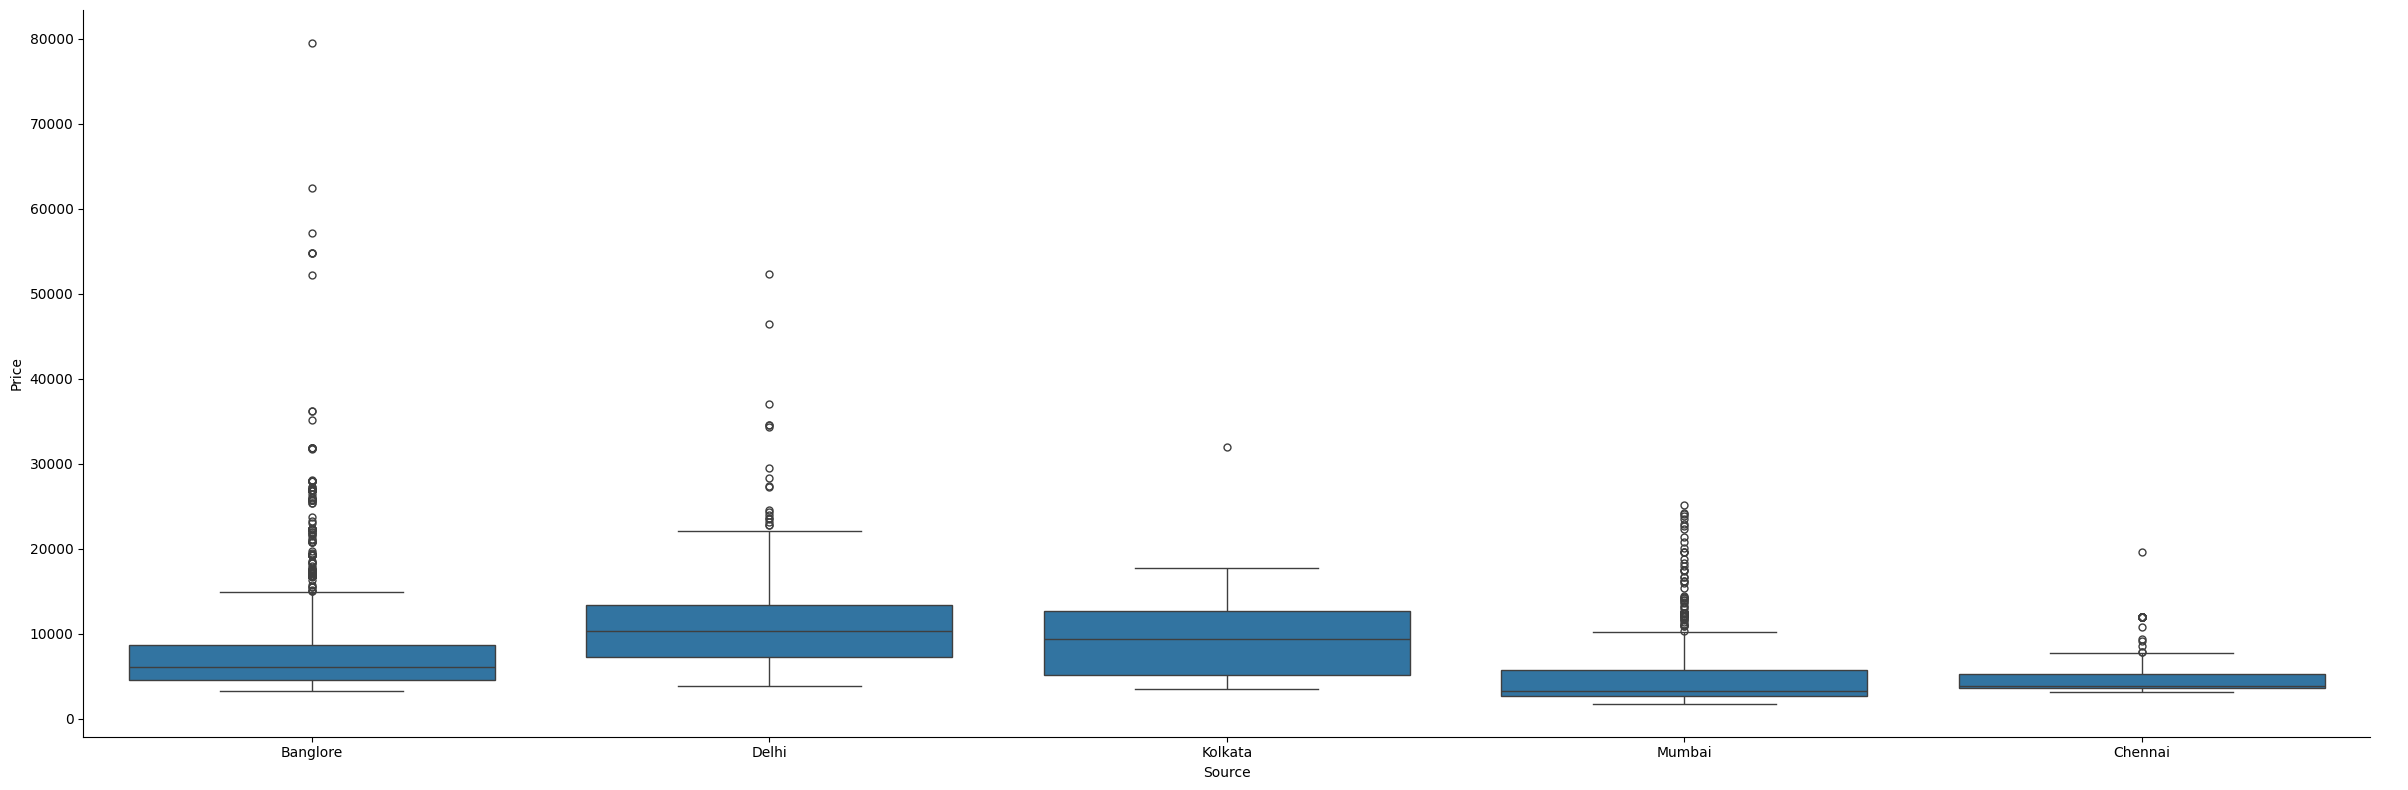

In [ ]:
sns.catplot(y="Price",x="Source",data=dftr.sort_values("Price",ascending=False),kind="box",height=8,aspect=3)
plt.show()

**Insights**:

with the help of cat plot only we are plotting a box plot between the price of the flight and the source place that is the place from where passengers will travel to the destination and we can see that Banglore is the source location has the most outliers while Chennai has the least.

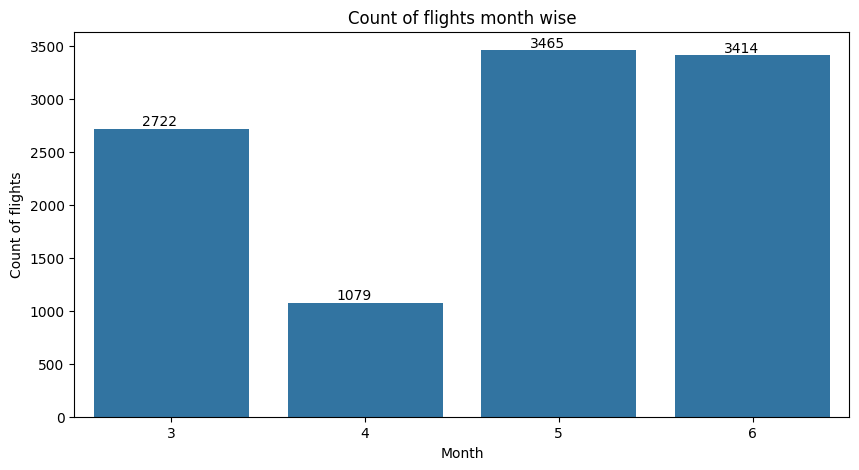

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x ='Month', data =dftr)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color='black')

**Insights:**

Here in the above graph we have plotted the count plot for journey in a month vs several flights.

And got to see that June has the most number of flights.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy')])

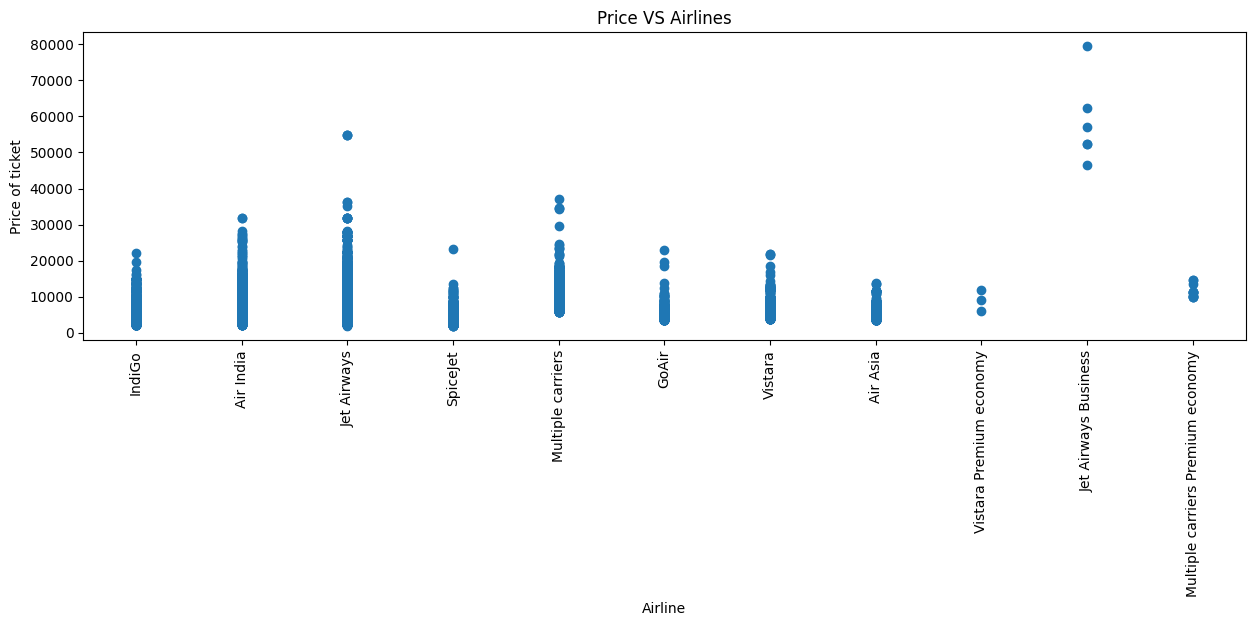

In [ ]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(dftr['Airline'],dftr['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation=90)

**Insights:**
In the above graph,we have plotted Airline against price of ticket in the scatter plot.Here we can see that when all of the airlines are compared based on prices,Jet Airways Business has the highest price.

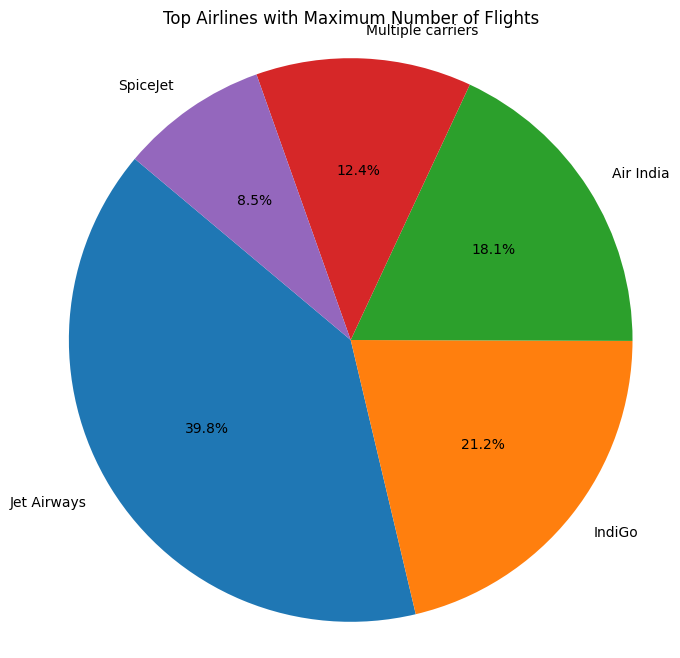

In [ ]:
import matplotlib.pyplot as plt

# Count the number of flights for each airline
airline_counts = dftr['Airline'].value_counts()

# Get the top 5 airlines with the maximum number of flights
top_airlines = airline_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_airlines, labels=top_airlines.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Airlines with Maximum Number of Flights')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**Insights:**

We can see maximum number of flights run by Jet Airways while minimum Flights run by Spicejet.

Around 25% of flights of Business Class.

<Axes: ylabel='Price'>

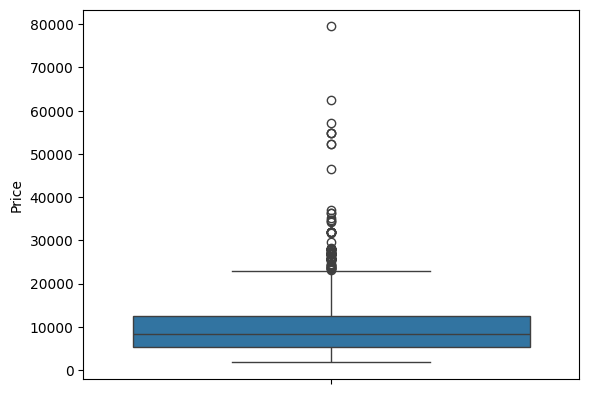

In [ ]:
sns.boxplot(dftr['Price'])

In [ ]:
dftr[dftr['Price']>75000]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Year,Month,Date,Dur_hours,Dur_min
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,1 stop,Business class,79512,2019,3,1,5.0,40.0


In [ ]:
dftr[dftr['Airline'] == 'Jet Airways Business']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Year,Month,Date,Dur_hours,Dur_min
657,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,1 stop,No info,52229,2019,3,1,5.0,0.0
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,1 stop,Business class,79512,2019,3,1,5.0,40.0
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,1 stop,Business class,62427,2019,3,1,6.0,40.0
7351,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,2 stops,No info,46490,2019,3,3,8.0,20.0
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,2 stops,No info,52285,2019,3,6,8.0,20.0
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,1 stop,Business class,57209,2019,3,1,4.0,40.0


In [ ]:
# Applying log transformation to our Dependent Variable Price to make it normalize

dftr['Price'] = np.log(dftr['Price'])

<Axes: xlabel='Price', ylabel='Density'>

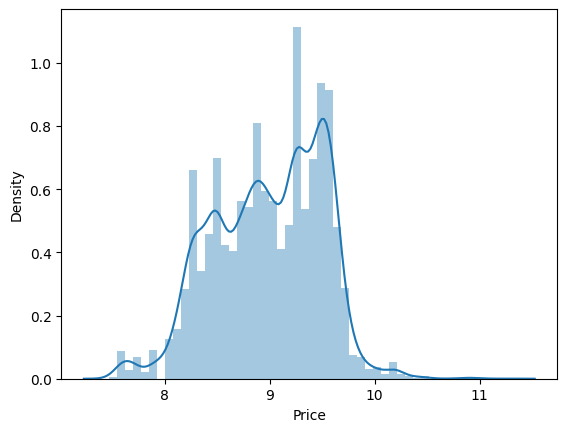

In [ ]:
sns.distplot(dftr['Price'])

<Axes: ylabel='Price'>

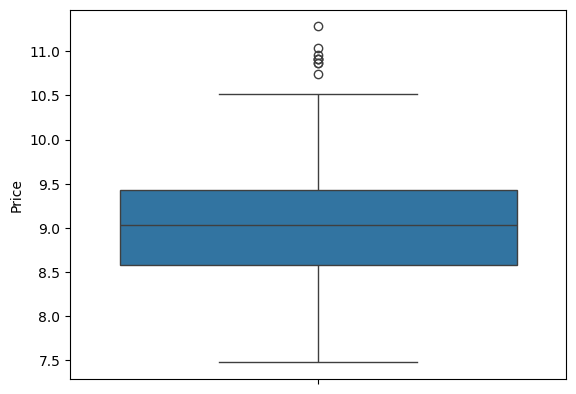

In [ ]:
sns.boxplot(dftr['Price'])

In [ ]:
# Adding Dep_hour and Dep_min column to dftr dataframe

dftr["Dep_hour"] = pd.to_datetime(dftr["Dep_Time"]).dt.hour
dftr["Dep_min"] = pd.to_datetime(dftr["Dep_Time"]).dt.minute

In [ ]:
dftr.drop(["Dep_Time"], axis = 1, inplace = True)

In [ ]:
dftr.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Year,Month,Date,Dur_hours,Dur_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,8.267962,2019,3,24,2.0,50.0,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,8.944028,2019,5,1,7.0,25.0,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,9.538348,2019,6,9,19.0,0.0,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,8.735204,2019,5,12,5.0,25.0,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,9.495670,2019,3,1,4.0,45.0,16,50


In [ ]:
# Adding Arrival_hour and Arrival_min column to dftr dataframe

dftr["Arrival_hour"] = pd.to_datetime(dftr["Arrival_Time"]).dt.hour
dftr["Arrival_min"] = pd.to_datetime(dftr["Arrival_Time"]).dt.minute

In [ ]:
dftr.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
# Additional_Info contains almost 80% no_info
# Also, the Routes and Total_Stops are related to each other

dftr.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [ ]:
dftr.head()

,Airline,Source,Destination,Total_Stops,Price,Year,Month,Date,Dur_hours,Dur_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,8.267962,2019,3,24,2.0,50.0,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,8.944028,2019,5,1,7.0,25.0,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,9.538348,2019,6,9,19.0,0.0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,8.735204,2019,5,12,5.0,25.0,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,9.495670,2019,3,1,4.0,45.0,16,50,21,35


In [ ]:
# The Total_Stops is an Ordinal Categorical type therefore we perform LabelEncoder

dftr.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [ ]:
dftr.head()

,Airline,Source,Destination,Total_Stops,Price,Year,Month,Date,Dur_hours,Dur_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,0,8.267962,2019,3,24,2.0,50.0,22,20,1,10
1,Air India,Kolkata,Banglore,2,8.944028,2019,5,1,7.0,25.0,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,9.538348,2019,6,9,19.0,0.0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,8.735204,2019,5,12,5.0,25.0,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,9.495670,2019,3,1,4.0,45.0,16,50,21,35


# Dealing with Categorical Data

In [ ]:
dftr['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       695
Chennai      381
Name: count, dtype: int64

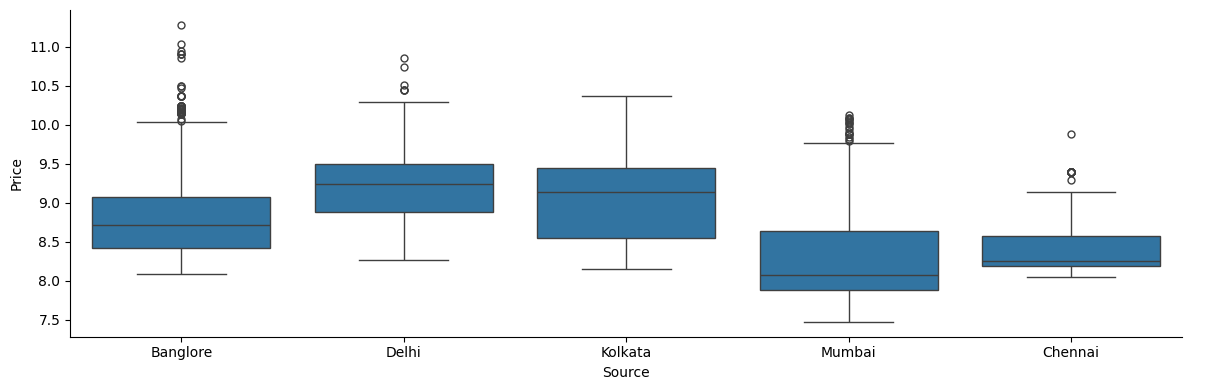

In [ ]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = dftr.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

In [ ]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = dftr[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [ ]:
dftr['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     695
Kolkata       381
Name: count, dtype: int64

In [ ]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = dftr[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


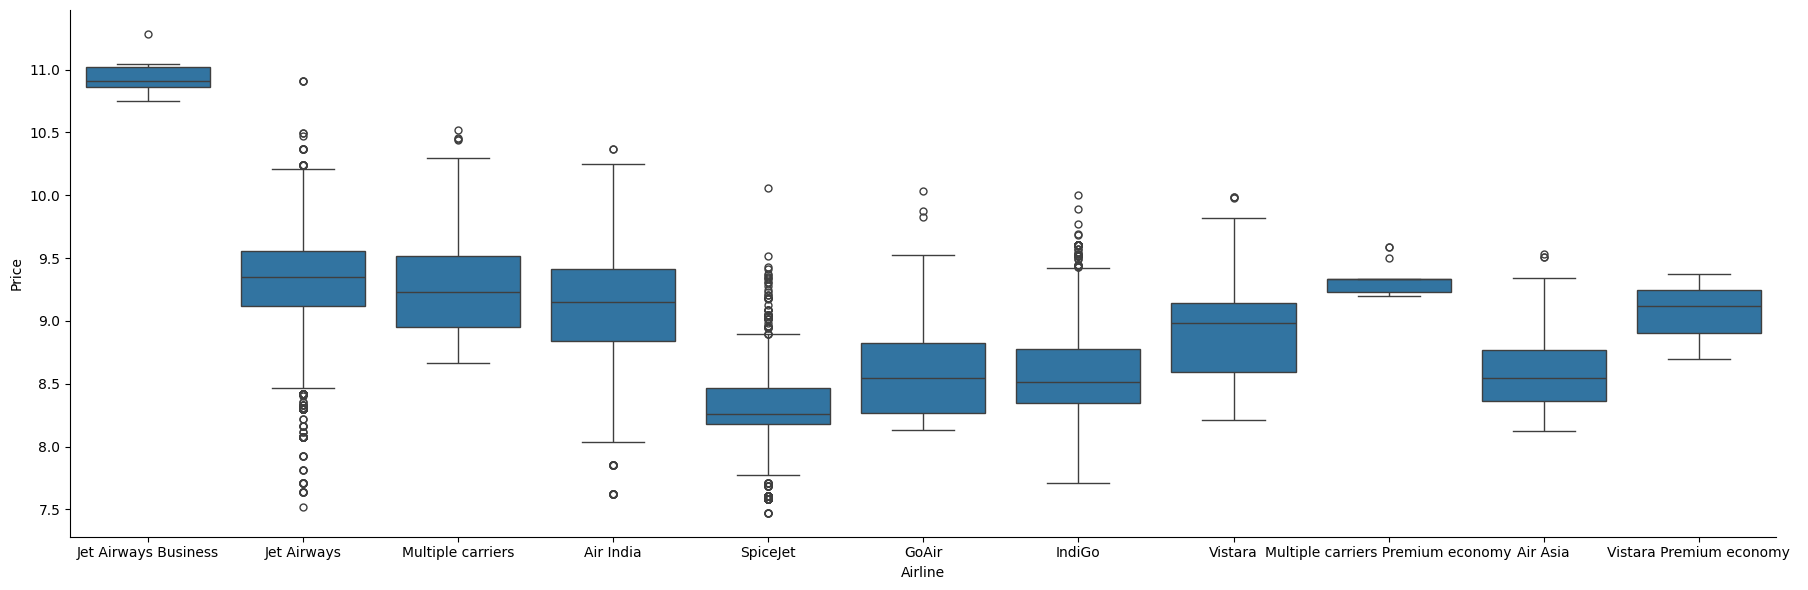

In [ ]:
#Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = dftr.sort_values("Price", ascending = False), kind="box", height = 6, aspect = 3)
plt.show()

# From graph, it is clear that Jet Airways Business have the highest Price.
# Apart from that almost all are having similar median

In [ ]:
dftr['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: count, dtype: int64

In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = dftr[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False


In [ ]:
dftr.head()

,Airline,Source,Destination,Total_Stops,Price,Year,Month,Date,Dur_hours,Dur_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,0,8.267962,2019,3,24,2.0,50.0,22,20,1,10
1,Air India,Kolkata,Banglore,2,8.944028,2019,5,1,7.0,25.0,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,9.538348,2019,6,9,19.0,0.0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,8.735204,2019,5,12,5.0,25.0,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,9.495670,2019,3,1,4.0,45.0,16,50,21,35


In [ ]:
# Concatenating dataframe -> Dftr + Airline + Source + Destination

dftr1 = pd.concat([dftr, Airline, Source, Destination], axis = 1)

In [ ]:
dftr1.head()

,Airline,Source,Destination,Total_Stops,Price,Year,Month,Date,Dur_hours,Dur_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,8.267962,2019,3,24,2.0,50.0,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,8.944028,2019,5,1,7.0,25.0,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,9.538348,2019,6,9,19.0,0.0,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,8.735204,2019,5,12,5.0,25.0,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,9.495670,2019,3,1,4.0,45.0,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
dftr1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
dftr1.head()

,Total_Stops,Price,Year,Month,Date,Dur_hours,Dur_min,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,8.267962,2019,3,24,2.0,50.0,22,20,1,...,False,False,False,False,False,False,False,False,False,True
1,2,8.944028,2019,5,1,7.0,25.0,5,50,13,...,False,False,False,True,False,False,False,False,False,False
2,2,9.538348,2019,6,9,19.0,0.0,9,25,4,...,False,False,True,False,False,True,False,False,False,False
3,1,8.735204,2019,5,12,5.0,25.0,18,5,23,...,False,False,False,True,False,False,False,False,False,False
4,1,9.495670,2019,3,1,4.0,45.0,16,50,21,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
dftr.drop(["Year"], axis=1, inplace=True)
dftr1.drop(["Year"], axis=1, inplace=True)

In [ ]:
dftr1.shape

(10680, 29)

# Test Data
**Similar Data Cleaning Process will be followed for the Test Dataset**

In [ ]:
dfts = pd.read_excel('/content/Flight_Fare.xlsx')

In [ ]:
dfts.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
dfts.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [ ]:
dfts.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [ ]:
dfts.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [ ]:
dfts.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0.0,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2.0,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,13302


In [ ]:
dfts['Year'] = pd.to_datetime(dfts['Date_of_Journey']).dt.year
dfts['Month'] = pd.to_datetime(dfts['Date_of_Journey']).dt.month
dfts['Date'] = pd.to_datetime(dfts['Date_of_Journey']).dt.day

In [ ]:
dfts.drop(['Date_of_Journey'], axis=1,inplace=True)

In [ ]:
dfts.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Year,Month,Date
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0.0,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,7662,2019,5,1
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2.0,13882,2019,6,9
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,6218,2019,5,12
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,13302,2019,3,1


In [ ]:
dfts["Dep_hour"] = pd.to_datetime(dfts["Dep_Time"]).dt.hour
dfts["Dep_min"] = pd.to_datetime(dfts["Dep_Time"]).dt.minute

In [ ]:
dfts["Arrival_hour"] = pd.to_datetime(dfts["Arrival_Time"]).dt.hour
dfts["Arrival_min"] = pd.to_datetime(dfts["Arrival_Time"]).dt.minute

In [ ]:
dfts.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [ ]:
dfts.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Year,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2.0,7662,2019,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2.0,13882,2019,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,6218,2019,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,13302,2019,3,1,16,50,21,35


In [ ]:
dfts[dfts['Duration']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Price,Year,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min
6474,Air India,Mumbai,Hyderabad,5m,2.0,17327,2019,3,6,16,50,16,55


In [ ]:
dfts.drop([2660,],axis=0,inplace=True)

In [ ]:
dfts.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Year,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2.0,7662,2019,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2.0,13882,2019,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,6218,2019,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,13302,2019,3,1,16,50,21,35


In [ ]:
dfts['Dur_min'] = dfts['Duration'].str.split(' ').str[1].str[:-1].astype(float)

In [ ]:
dfts.drop(['Duration'],axis=1,inplace=True)

In [ ]:
dfts.head()

,Airline,Source,Destination,Total_Stops,Price,Year,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_min
0,IndiGo,Banglore,New Delhi,0.0,3897,2019,3,24,22,20,1,10,50.0
1,Air India,Kolkata,Banglore,2.0,7662,2019,5,1,5,50,13,15,25.0
2,Jet Airways,Delhi,Cochin,2.0,13882,2019,6,9,9,25,4,25,NaN
3,IndiGo,Kolkata,Banglore,1.0,6218,2019,5,12,18,5,23,30,25.0
4,IndiGo,Banglore,New Delhi,1.0,13302,2019,3,1,16,50,21,35,45.0


In [ ]:
Source = dfts[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [ ]:
Destination = dfts[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [ ]:
Airline = dfts[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
dfts1 = pd.concat([dfts, Airline, Source, Destination], axis = 1)

In [ ]:
dfts1.head()

,Airline,Source,Destination,Total_Stops,Price,Year,Month,Date,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,2019,3,24,22,20,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2.0,7662,2019,5,1,5,50,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2.0,13882,2019,6,9,9,25,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1.0,6218,2019,5,12,18,5,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1.0,13302,2019,3,1,16,50,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
dfts1.drop(["Airline", "Source", "Destination","Year"], axis = 1, inplace = True)

In [ ]:
dfts1.head()

,Total_Stops,Price,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,3,24,22,20,1,10,50.0,False,...,False,False,False,False,False,False,False,False,False,True
1,2.0,7662,5,1,5,50,13,15,25.0,True,...,False,False,False,True,False,False,False,False,False,False
2,2.0,13882,6,9,9,25,4,25,NaN,False,...,False,False,True,False,False,True,False,False,False,False
3,1.0,6218,5,12,18,5,23,30,25.0,False,...,False,False,False,True,False,False,False,False,False,False
4,1.0,13302,3,1,16,50,21,35,45.0,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
dfts1.head()

,Total_Stops,Price,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,3,24,22,20,1,10,50.0,False,...,False,False,False,False,False,False,False,False,False,True
1,2.0,7662,5,1,5,50,13,15,25.0,True,...,False,False,False,True,False,False,False,False,False,False
2,2.0,13882,6,9,9,25,4,25,NaN,False,...,False,False,True,False,False,True,False,False,False,False
3,1.0,6218,5,12,18,5,23,30,25.0,False,...,False,False,False,True,False,False,False,False,False,False
4,1.0,13302,3,1,16,50,21,35,45.0,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
dftr1.columns

Index(['Total_Stops', 'Price', 'Month', 'Date', 'Dur_hours', 'Dur_min',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [ ]:
X = dftr1.loc[:, ['Total_Stops', 'Date', 'Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Dur_hours',
       'Dur_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_hours,Dur_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2.0,50.0,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7.0,25.0,True,...,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19.0,0.0,False,...,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5.0,25.0,False,...,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4.0,45.0,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
dftr.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy'], dtype=object)

In [ ]:
for i in ['Airline', 'Source', 'Destination']:
  print(i,dftr[i].unique())


Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in['Airline','Source','Destination']:
  dftr[i]=le.fit_transform(dftr[i])
dftr.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Date,Dur_hours,Dur_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,0,8.267962,3,24,2.0,50.0,22,20,1,10
1,1,3,0,2,8.944028,5,1,7.0,25.0,5,50,13,15
2,4,2,1,2,9.538348,6,9,19.0,0.0,9,25,4,25
3,3,3,0,1,8.735204,5,12,5.0,25.0,18,5,23,30
4,3,0,5,1,9.495670,3,1,4.0,45.0,16,50,21,35


In [ ]:
dftr.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Date,Dur_hours,Dur_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,0,8.267962,3,24,2.0,50.0,22,20,1,10
1,1,3,0,2,8.944028,5,1,7.0,25.0,5,50,13,15
2,4,2,1,2,9.538348,6,9,19.0,0.0,9,25,4,25
3,3,3,0,1,8.735204,5,12,5.0,25.0,18,5,23,30
4,3,0,5,1,9.495670,3,1,4.0,45.0,16,50,21,35


In [ ]:
y = dftr1.iloc[:, 1]
y.head()

0    8.267962
1    8.944028
2    9.538348
3    8.735204
4    9.495670
Name: Price, dtype: float64

In [ ]:
dftr.columns


Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Month',
       'Date', 'Dur_hours', 'Dur_min', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min'],
      dtype='object')

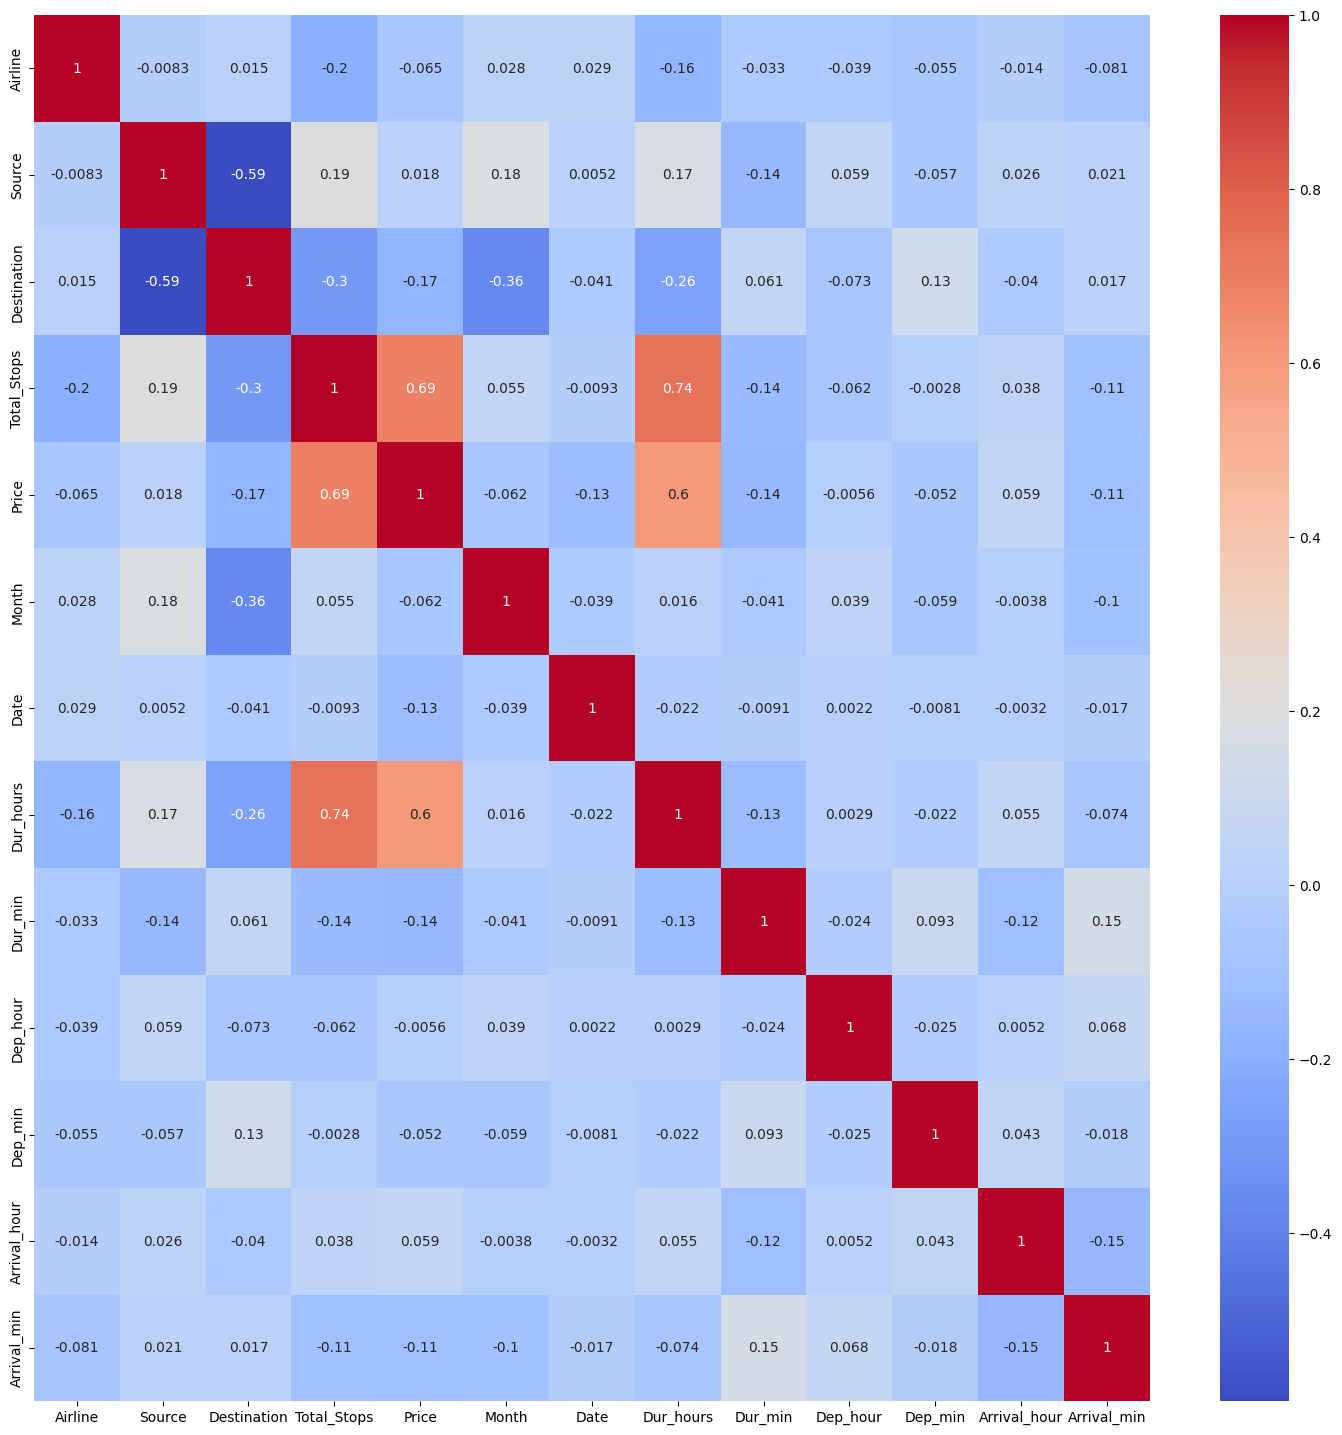

In [ ]:
plt.figure(figsize = (18,18))

sns.heatmap(dftr.corr(),annot= True, cmap = "coolwarm")

plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 10680 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       10680 non-null  int64  
 1   Source        10680 non-null  int64  
 2   Destination   10680 non-null  int64  
 3   Total_Stops   10680 non-null  int64  
 4   Price         10680 non-null  float64
 5   Month         10680 non-null  int32  
 6   Date          10680 non-null  int32  
 7   Dur_hours     10680 non-null  float64
 8   Dur_min       10680 non-null  float64
 9   Dep_hour      10680 non-null  int32  
 10  Dep_min       10680 non-null  int32  
 11  Arrival_hour  10680 non-null  int32  
 12  Arrival_min   10680 non-null  int32  
dtypes: float64(3), int32(6), int64(4)
memory usage: 1.1 MB


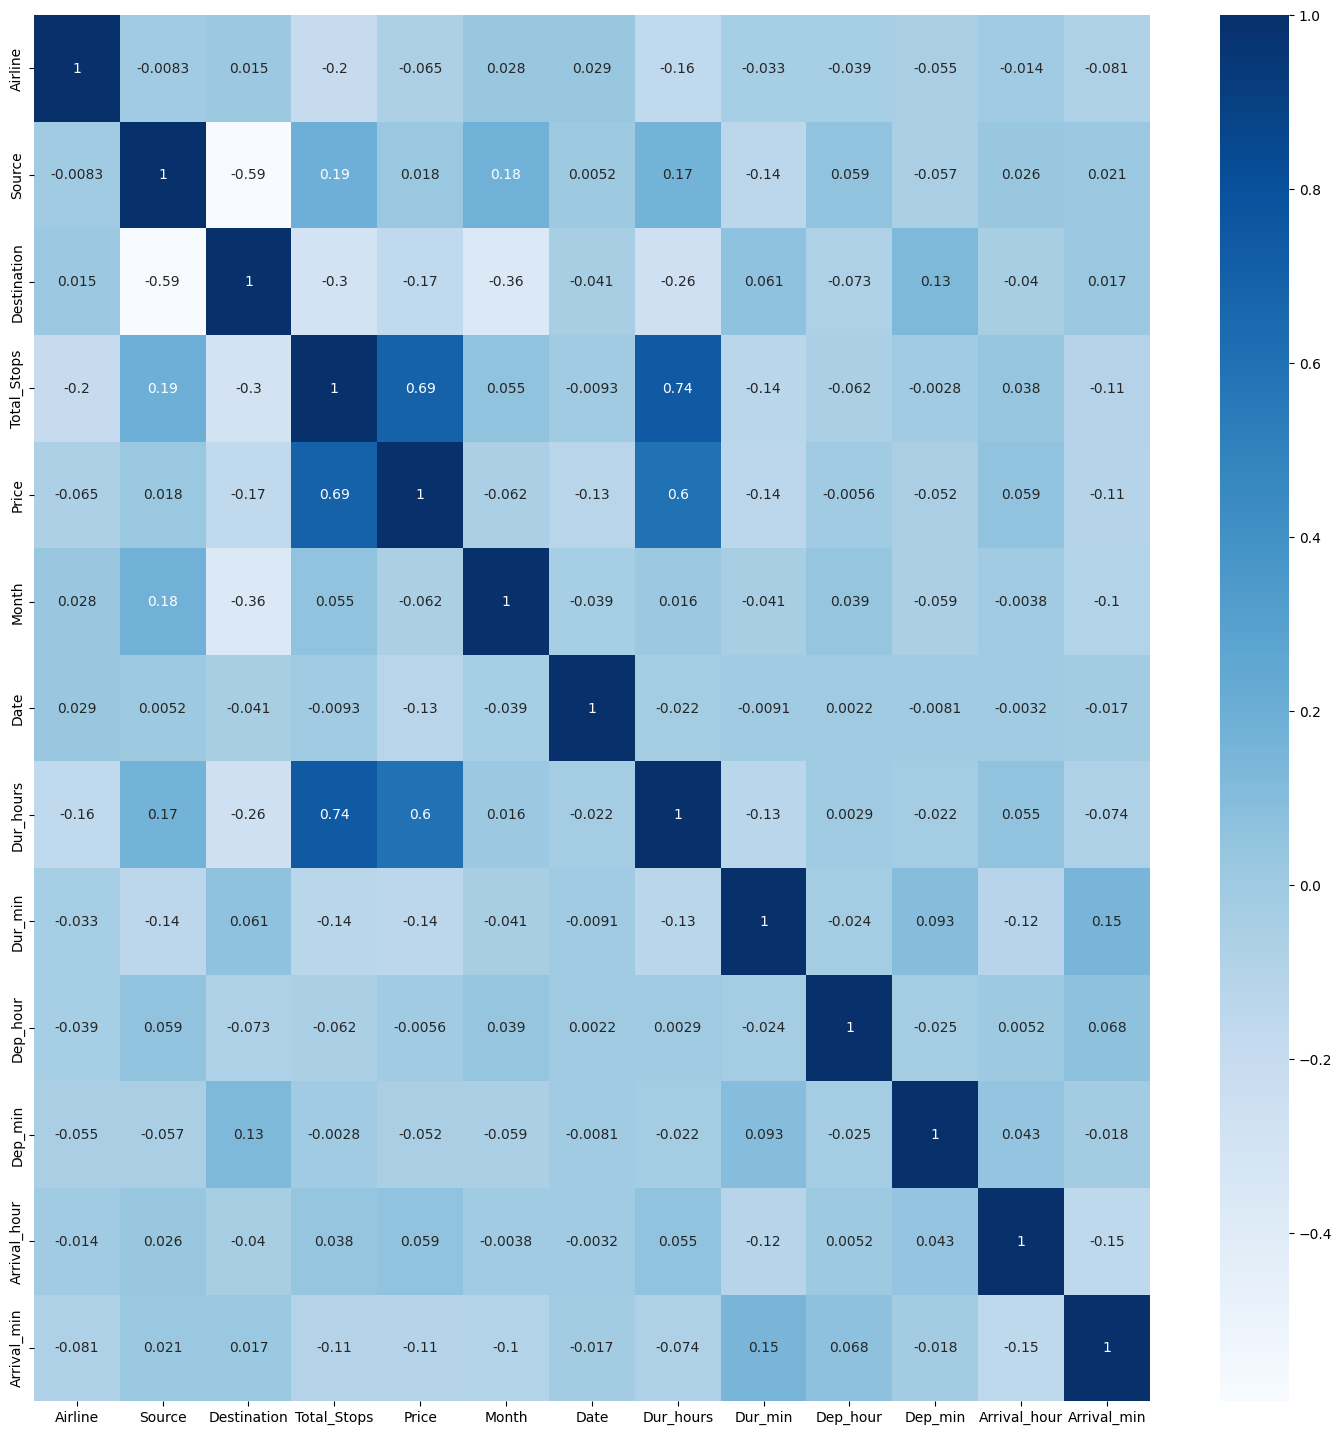

In [ ]:
dftr.info()
dftr = dftr[dftr['Airline'] != 'IndiGo']
dftr['Airline'] = dftr['Airline'].astype('category').cat.codes
plt.figure(figsize = (18,18))
sns.heatmap(dftr.corr(), annot = True, cmap = "Blues")

plt.show()


**Model Creation:**

**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([9.36278421, 9.28045081, 8.10136228, ..., 8.46350225, 8.1840636 ,
       9.29190344])

In [ ]:
y_pred = np.exp(y_pred)
y_pred

array([11646.77044181, 10726.26638232,  3298.95911344, ...,
        4738.62482883,  3583.38657625, 10849.8164224 ])

In [ ]:
y_test = np.exp(y_test)
y_test

5880     10262.0
6137     11399.0
7700      3597.0
1437     16757.0
8480      4409.0
          ...   
9454     12954.0
6391      3943.0
9273      4804.0
5381      2754.0
10037     9663.0
Name: Price, Length: 2136, dtype: float64

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
df1.head()

,Actual,Predicted
5880,10262.0,11646.770442
6137,11399.0,10726.266382
7700,3597.0,3298.959113
1437,16757.0,13832.067160
8480,4409.0,4950.836863


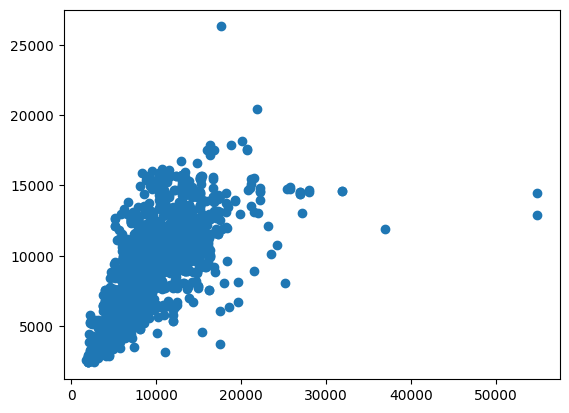

In [ ]:
plt.scatter(df1['Actual'], df1['Predicted'])

**Model Evaluation:**

In [ ]:
# Evaluate the performance of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 9879715.208469111


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 1993.2667968498329


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.5528063106264729


In [ ]:
# Calculating RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3143.2014266459464


**Model Creation:**

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
y_pred = np.exp(y_pred)
y_pred

array([14259.63158131, 14851.98647425,  3582.05041981, ...,
        5084.73055081,  3014.80344113, 11201.93365155])

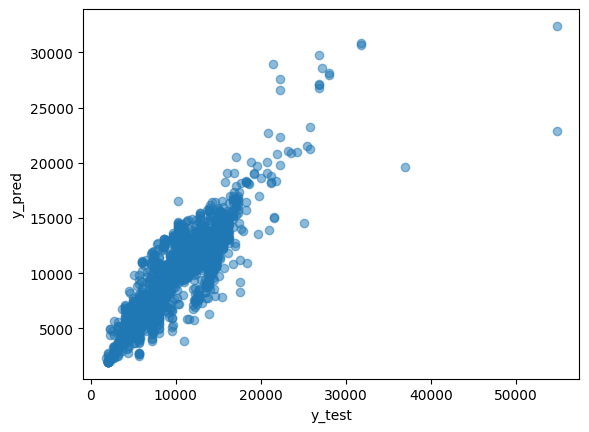

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head()

,Actual,Predicted
5880,10262.0,14259.631581
6137,11399.0,14851.986474
7700,3597.0,3582.050420
1437,16757.0,14213.690373
8480,4409.0,4489.170226


**Model Evaluation:**

In [ ]:
# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)



Mean Squared Error: 4233749.687419016
Mean Absolute Error: 1219.8635759286187
R² Score: 0.8083642997140299


In [ ]:
# Calculating RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2057.6077583978476


**Model Creation:**

**K Means**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you only need numerical features for clustering
X = dftr.select_dtypes(include=np.number)

# Fit KMeans to cluster the data
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# Assign cluster labels to the original dataset
dftr['cluster'] = kmeans.labels_


In [ ]:
# Compute average fare for each cluster
cluster_avg_fare = dftr.groupby('cluster')['Price'].mean()

In [ ]:
# Predict fares based on cluster assignment
dftr['predicted_fare'] = dftr['cluster'].map(cluster_avg_fare)

**Model Evaluation**

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(dftr['Price'], dftr['predicted_fare'])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(dftr['Price'], dftr['predicted_fare'])

# Calculate R-squared (R2) score
r2 = r2_score(dftr['Price'], dftr['predicted_fare'])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(dftr['Price'], dftr['predicted_fare']))

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.4232609897492923
Mean Squared Error (MSE): 0.2562962115684503
R-squared (R2) Score: 0.028250365427443414
Root Mean Squared Error (RMSE): 0.5062570607591071


**Gradient Boosting Regressor**

**Model Creation:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = gb_model.predict(X_test)



**Model Evaluation**

In [ ]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE) Score:", rmse)


Mean Absolute Error (MAE): 0.002364953040986227
Mean Squared Error (MSE): 2.104361573044475e-05
R-squared (R2) Score: 0.9999215714417855
Root Mean Squared Error (RMSE) Score: 0.004587332092888496


**Decision Tree:**

**Model Creation:**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create and train the decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

**Model Evaluation**

In [ ]:
# Evaluate the performance of the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test,predictions)
print("Mean Absolute Error:", mae)

# Calculate R² score
r2 = r2_score(y_test, predictions)
print("R² Score:", r2)

# Calculating RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 8.077573492174111e-05
Mean Absolute Error: 0.0004561596792808597
R² Score: 0.999698952665275
Root Mean Squared Error: 0.008987532193085103


**XG Boost model**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)


**Model Evaluation**

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 0.0001987740161409871
Mean Absolute Error: 0.0031204844081673885
R-squared Score: 0.9992591786651053
Root Mean Squared Error: 0.01409872391888667


**Hyperparameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Mean Squared Error: 5.15659342930849e-06


In [ ]:
final_model = best_model
final_model.fit(X, y)



RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=50)

In [ ]:
# Saving the final model for future use
import joblib
joblib.dump(final_model, 'final_flight_fare_prediction_model.pkl')


['final_flight_fare_prediction_model.pkl']

In [ ]:
# Loading the saved model
model = joblib.load("final_flight_fare_prediction_model.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([9.62025081, 8.96594945, 9.57715207, ..., 9.5575281 , 8.48115197,
       8.59518194])

In [ ]:
pd.DataFrame([model.predict(X_test)[:], y_test[:]], index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135
Predicted,9.620251,8.965949,9.577152,11.003382,8.799079,8.956357,9.685265,9.236206,9.516863,9.596564,...,8.391841,8.421120,9.424554,8.910316,8.438305,8.916180,9.291359,9.557528,8.481152,8.595182
Actual,9.619665,8.965973,9.576649,10.954467,8.799058,8.956351,9.685269,9.236203,9.516869,9.596555,...,8.392537,8.421783,9.425048,8.910316,8.438583,8.916238,9.291367,9.557541,8.481151,8.595265


**Conclusion:**

With this, we come to an end of our article – flight price prediction using machine learning. Our regression models have successfully forecasted airline ticket prices with notable accuracy. Through rigorous feature engineering and optimization, particularly in decision tree regression, we’ve gained valuable insights into market dynamics.

In summary, our study demonstrates the effectiveness of machine learning in forecasting airfare prices. Continued advancements in deep learning techniques will likely lead to even more precise predictions, benefiting travelers and industry stakeholders alike.

By Comparing the r2 score of every model we can conclude that Gradient boosting and Decision tree are the best model followed by XG Boost, Random Forest and Linear Regression